[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/populationcodes/random-matrix-gallery/HEAD?urlpath=%2Fdoc%2Ftree%2Fensembles%2FWigner.ipynb)

In [1]:
import plot
import utils

import math
import numpy as np
import scipy
import matplotlib.pyplot as plt
plt.style.use('./presentation.mplstyle')

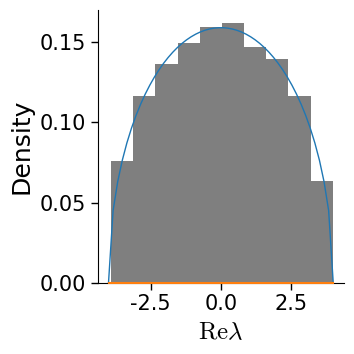

In [2]:
utils.init_randomness()

N = 500
J = 2

# Wij=Wji~Gaussian(0,J**2/N)
Wod = np.random.randn(int(N*(N-1)/2))*J/math.sqrt(N)   # off-diagonal terms
Wd = np.random.randn(N)*J/math.sqrt(N)                 # diagonal terms
W = scipy.spatial.distance.squareform(Wod)+np.diag(Wd)
z = np.linalg.eigvals(W) 

fig, s = plt.subplots(1, 1, figsize=(4, 4))
cx = s
plot.show_real_spectrum(cx, z)
x = np.linspace(-2*J, 2*J)
cx.plot(x, np.sqrt(2**2-(x/J)**2)/(2*np.pi*J), 'C0')
cx.plot(x, np.zeros_like(x), 'C1', linewidth=1.5, zorder=10, clip_on=False)

name = utils.get_script_name()
if name is not None:
    fig.savefig("../images/%s.png"%name)
plt.show()

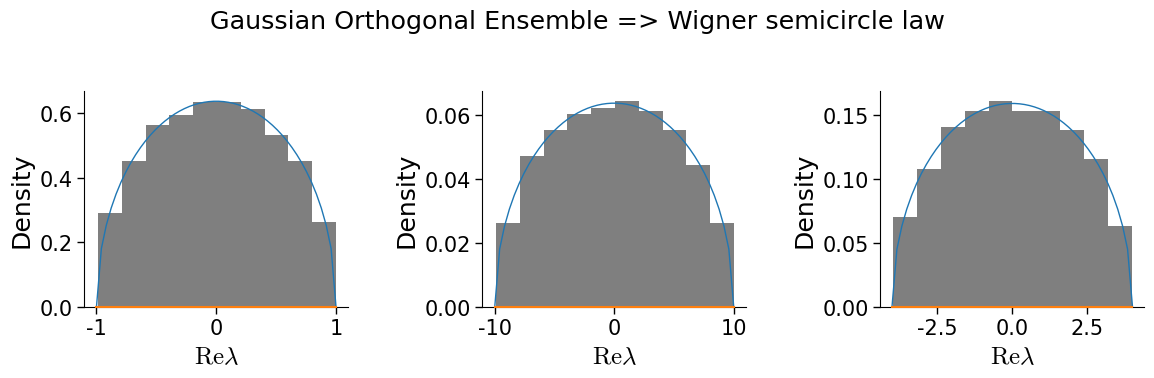

In [3]:
N = 500
Js = [0.5, 5, 2]

fig, s = plt.subplots(1, len(Js), figsize=(4*len(Js), 4))
for i in range(len(Js)):
    J = Js[i]
    # Wij=Wji~Gaussian(0,J**2/N)
    Wod = np.random.randn(int(N*(N-1)/2))*J/math.sqrt(N)   # off-diagonal terms
    Wd = np.random.randn(N)*J/math.sqrt(N)                 # diagonal terms
    W = scipy.spatial.distance.squareform(Wod)+np.diag(Wd)
    z = np.linalg.eigvals(W) 

    cx = s[i]
    plot.show_real_spectrum(cx, z)
    x = np.linspace(-2*J, 2*J)
    cx.plot(x, np.sqrt(2**2-(x/J)**2)/(2*np.pi*J), 'C0')
    cx.plot(x, np.zeros_like(x), 'C1', linewidth=1.5, zorder=10, clip_on=False)

fig.suptitle('Gaussian Orthogonal Ensemble => Wigner semicircle law', fontsize="small")
plt.show()